# Data Preparation & Pre-processing

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
import scipy.stats as stats
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

## Load Dataset

In [2]:
app_train = pd.read_csv('application_train.csv')

In [3]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
app_train.info(verbose = True,show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

## Check Missing Value

In [5]:
df = app_train.copy()

In [6]:
# Check null values
total_null = df.isnull().sum()
percent_missing = df.isnull().sum() * 100/ len(df)
dtypes = [df[col].dtype for col in df.columns]
df_missing_value = pd.DataFrame({'total_null': total_null,
                                'data_type': dtypes,
                                'percent_missing': percent_missing})
df_missing_value.sort_values('percent_missing', ascending = False,inplace = True)
missing_value = df_missing_value[df_missing_value['percent_missing']>0].reset_index()
missing_value

,index,total_null,data_type,percent_missing
0,COMMONAREA_MEDI,214865,float64,69.872297
1,COMMONAREA_AVG,214865,float64,69.872297
2,COMMONAREA_MODE,214865,float64,69.872297
3,NONLIVINGAPARTMENTS_MODE,213514,float64,69.432963
4,NONLIVINGAPARTMENTS_AVG,213514,float64,69.432963
5,NONLIVINGAPARTMENTS_MEDI,213514,float64,69.432963
6,FONDKAPREMONT_MODE,210295,object,68.386172
7,LIVINGAPARTMENTS_MODE,210199,float64,68.354953
8,LIVINGAPARTMENTS_AVG,210199,float64,68.354953
9,LIVINGAPARTMENTS_MEDI,210199,float64,68.354953


In [7]:
# Drop feature that have more than 35% missing value
col_full_null = df_missing_value.loc[df_missing_value['percent_missing']> 35].index.tolist()

In [8]:
# Create Function to remove feature that have more than 35% missing value
def col_full_null(df):
    list_drop_col = ['COMMONAREA_MEDI','COMMONAREA_AVG','COMMONAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAPARTMENTS_AVG','NONLIVINGAPARTMENTS_MEDI',
                     'FONDKAPREMONT_MODE','LIVINGAPARTMENTS_MODE','LIVINGAPARTMENTS_AVG','LIVINGAPARTMENTS_MEDI','FLOORSMIN_AVG','FLOORSMIN_MODE','FLOORSMIN_MEDI',
                     'YEARS_BUILD_MEDI','YEARS_BUILD_MODE','YEARS_BUILD_AVG','OWN_CAR_AGE','LANDAREA_MEDI','LANDAREA_MODE','LANDAREA_AVG','BASEMENTAREA_MEDI',
                     'BASEMENTAREA_AVG','BASEMENTAREA_MODE','NONLIVINGAREA_MODE','NONLIVINGAREA_AVG','NONLIVINGAREA_MEDI','ELEVATORS_MEDI','ELEVATORS_AVG',
                     'ELEVATORS_MODE','WALLSMATERIAL_MODE','APARTMENTS_MEDI','APARTMENTS_AVG','APARTMENTS_MODE','ENTRANCES_MEDI','ENTRANCES_AVG','ENTRANCES_MODE','LIVINGAREA_AVG',
                     'LIVINGAREA_MODE','LIVINGAREA_MEDI','HOUSETYPE_MODE','FLOORSMAX_MODE','FLOORSMAX_MEDI','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE',
                     'YEARS_BEGINEXPLUATATION_MEDI','YEARS_BEGINEXPLUATATION_AVG','TOTALAREA_MODE','EMERGENCYSTATE_MODE']
    df.drop(columns=list_drop_col, inplace = True)

In [9]:
col_full_null(df)

## EDA

In [10]:
df_eda = df.copy()

In [11]:
num = df_eda.select_dtypes(include='number').columns
cat = df_eda.select_dtypes(include='object').columns

## Univariate Analysis

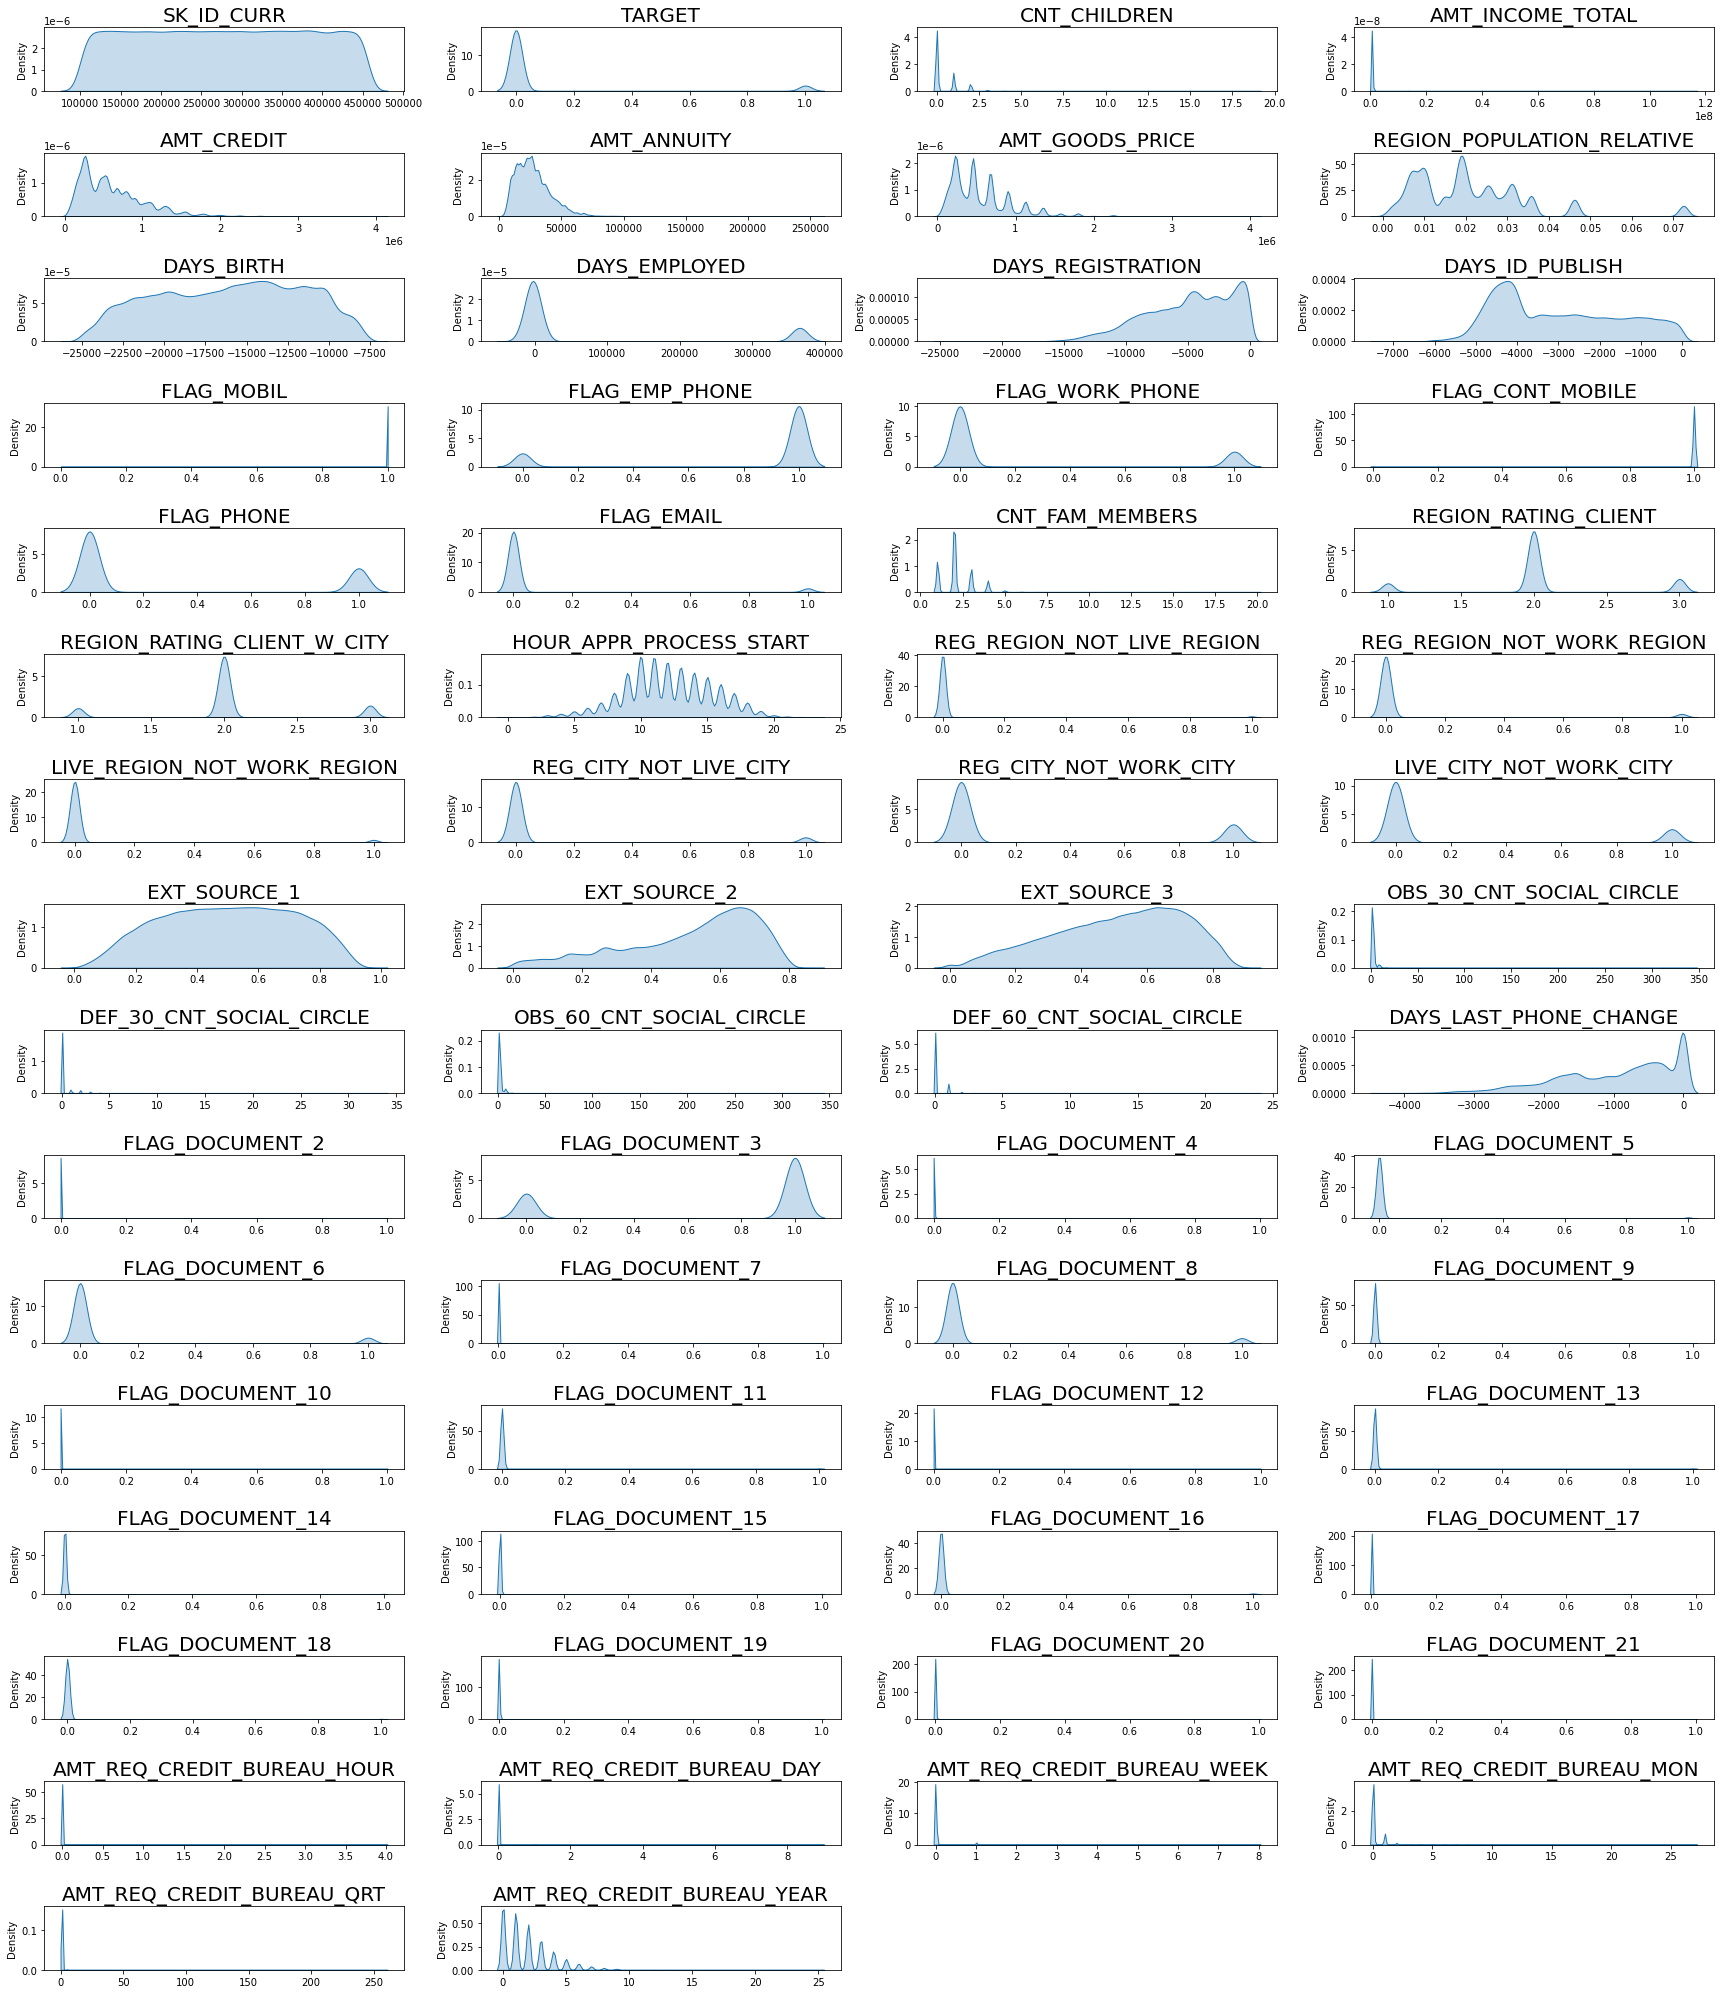

In [12]:
plt.figure(figsize=(24,28))
for i in range(0,len(num)):
    plt.subplot(16,4,i+1)
    sns.kdeplot(x=df_eda[num[i]], palette='viridis', shade=True)
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

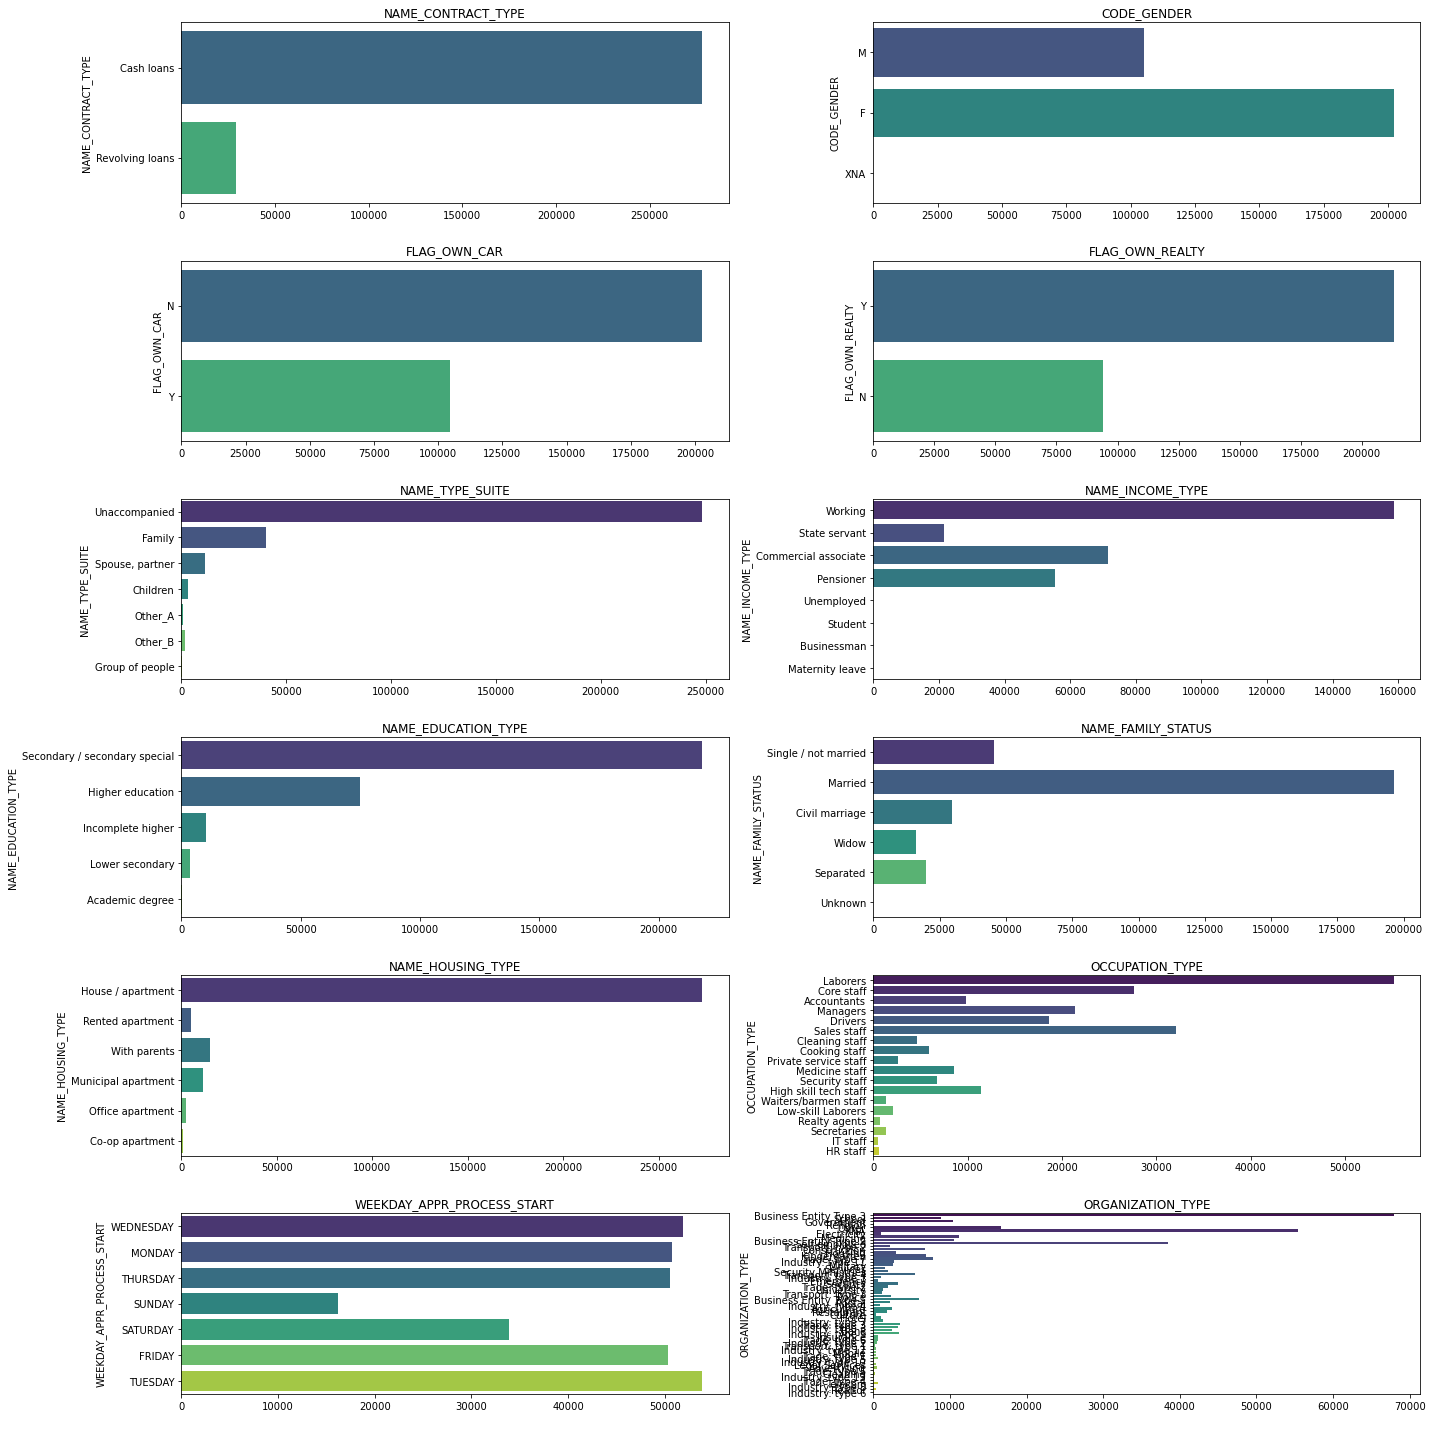

In [13]:
plt.figure(figsize=(20,20))
for i in range(0,len(cat)):
    plt.subplot(6,2,i+1)
    sns.countplot(y=df_eda[cat[i]], orient = 'h',palette='viridis')
    plt.title(cat[i])
    plt.xlabel(' ')
    plt.tight_layout()

### Bivariate Analysis

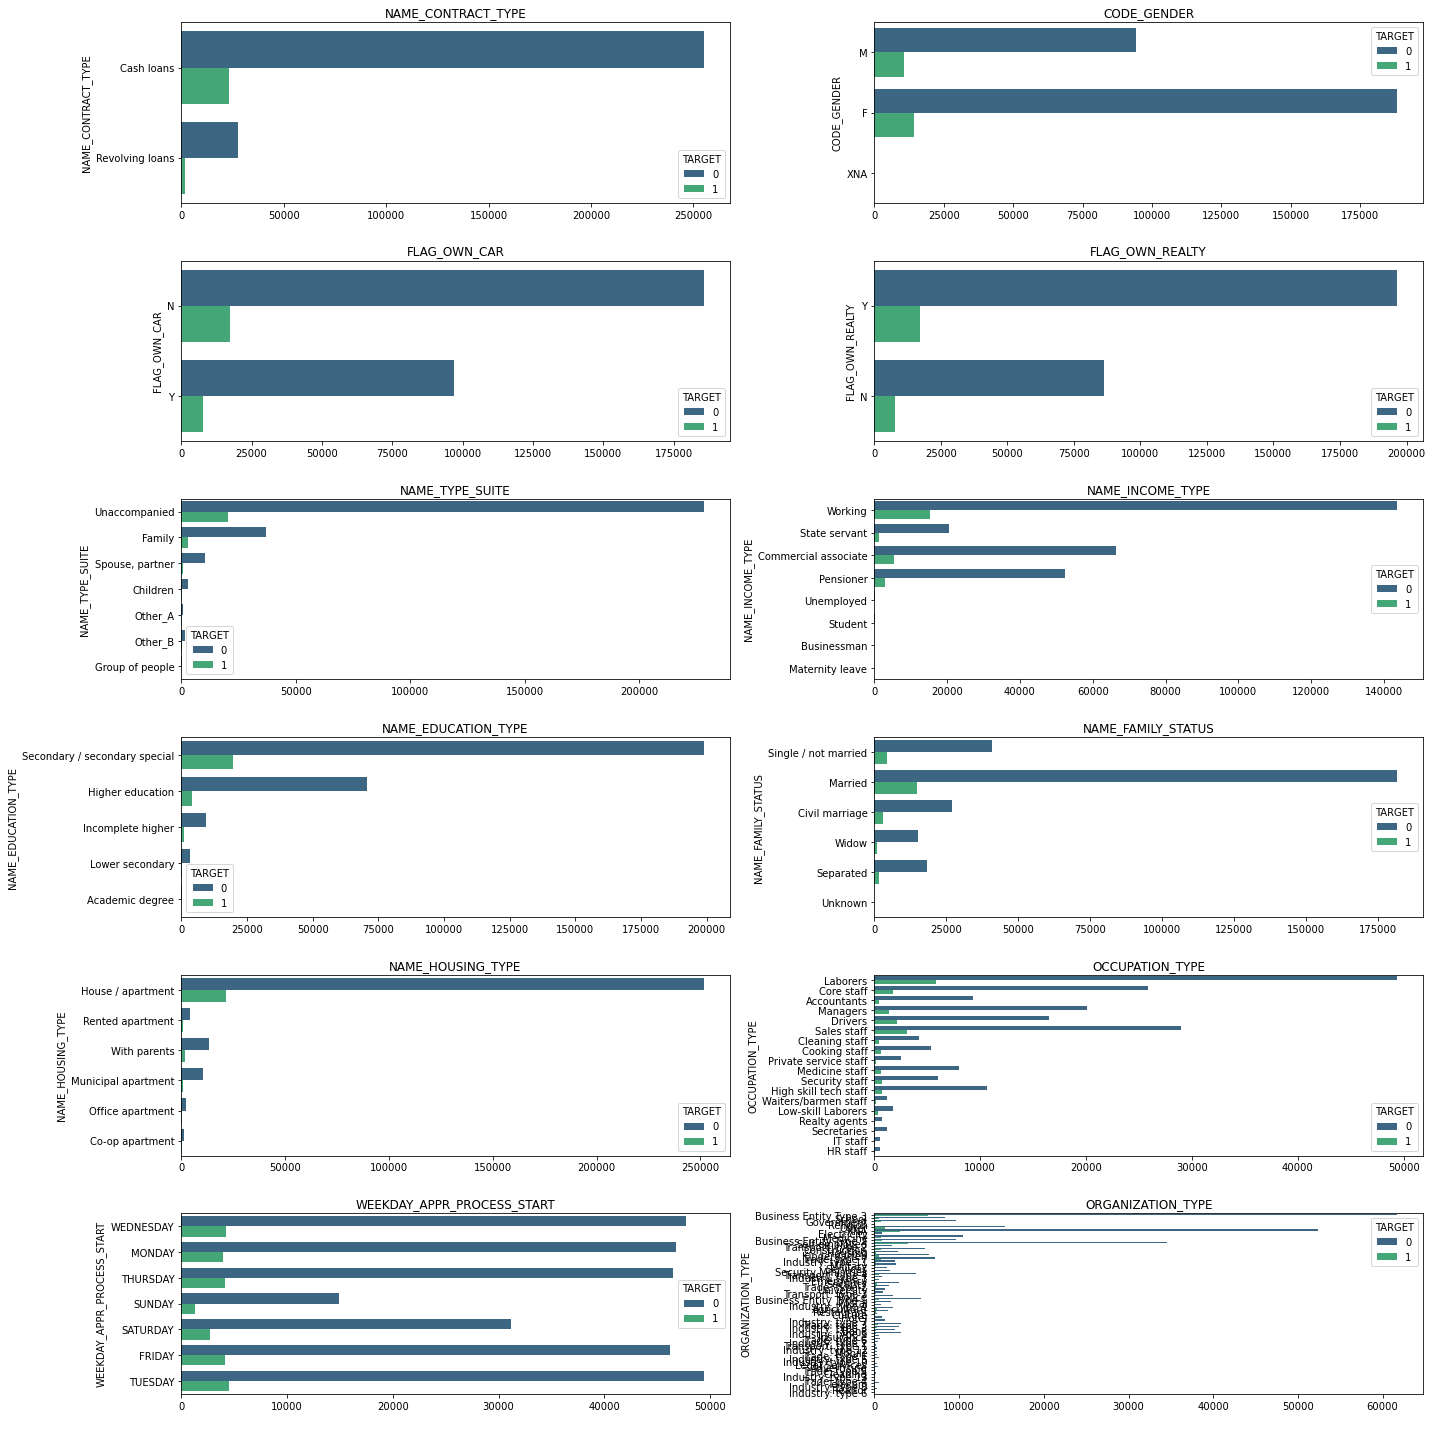

In [14]:
plt.figure(figsize=(20,20))
for i in range(0,len(cat)):
    plt.subplot(6,2,i+1)
    sns.countplot(y=df_eda[cat[i]], palette='viridis', hue=df_eda['TARGET'])
    plt.title(cat[i])
    plt.xlabel(' ')
    plt.tight_layout()

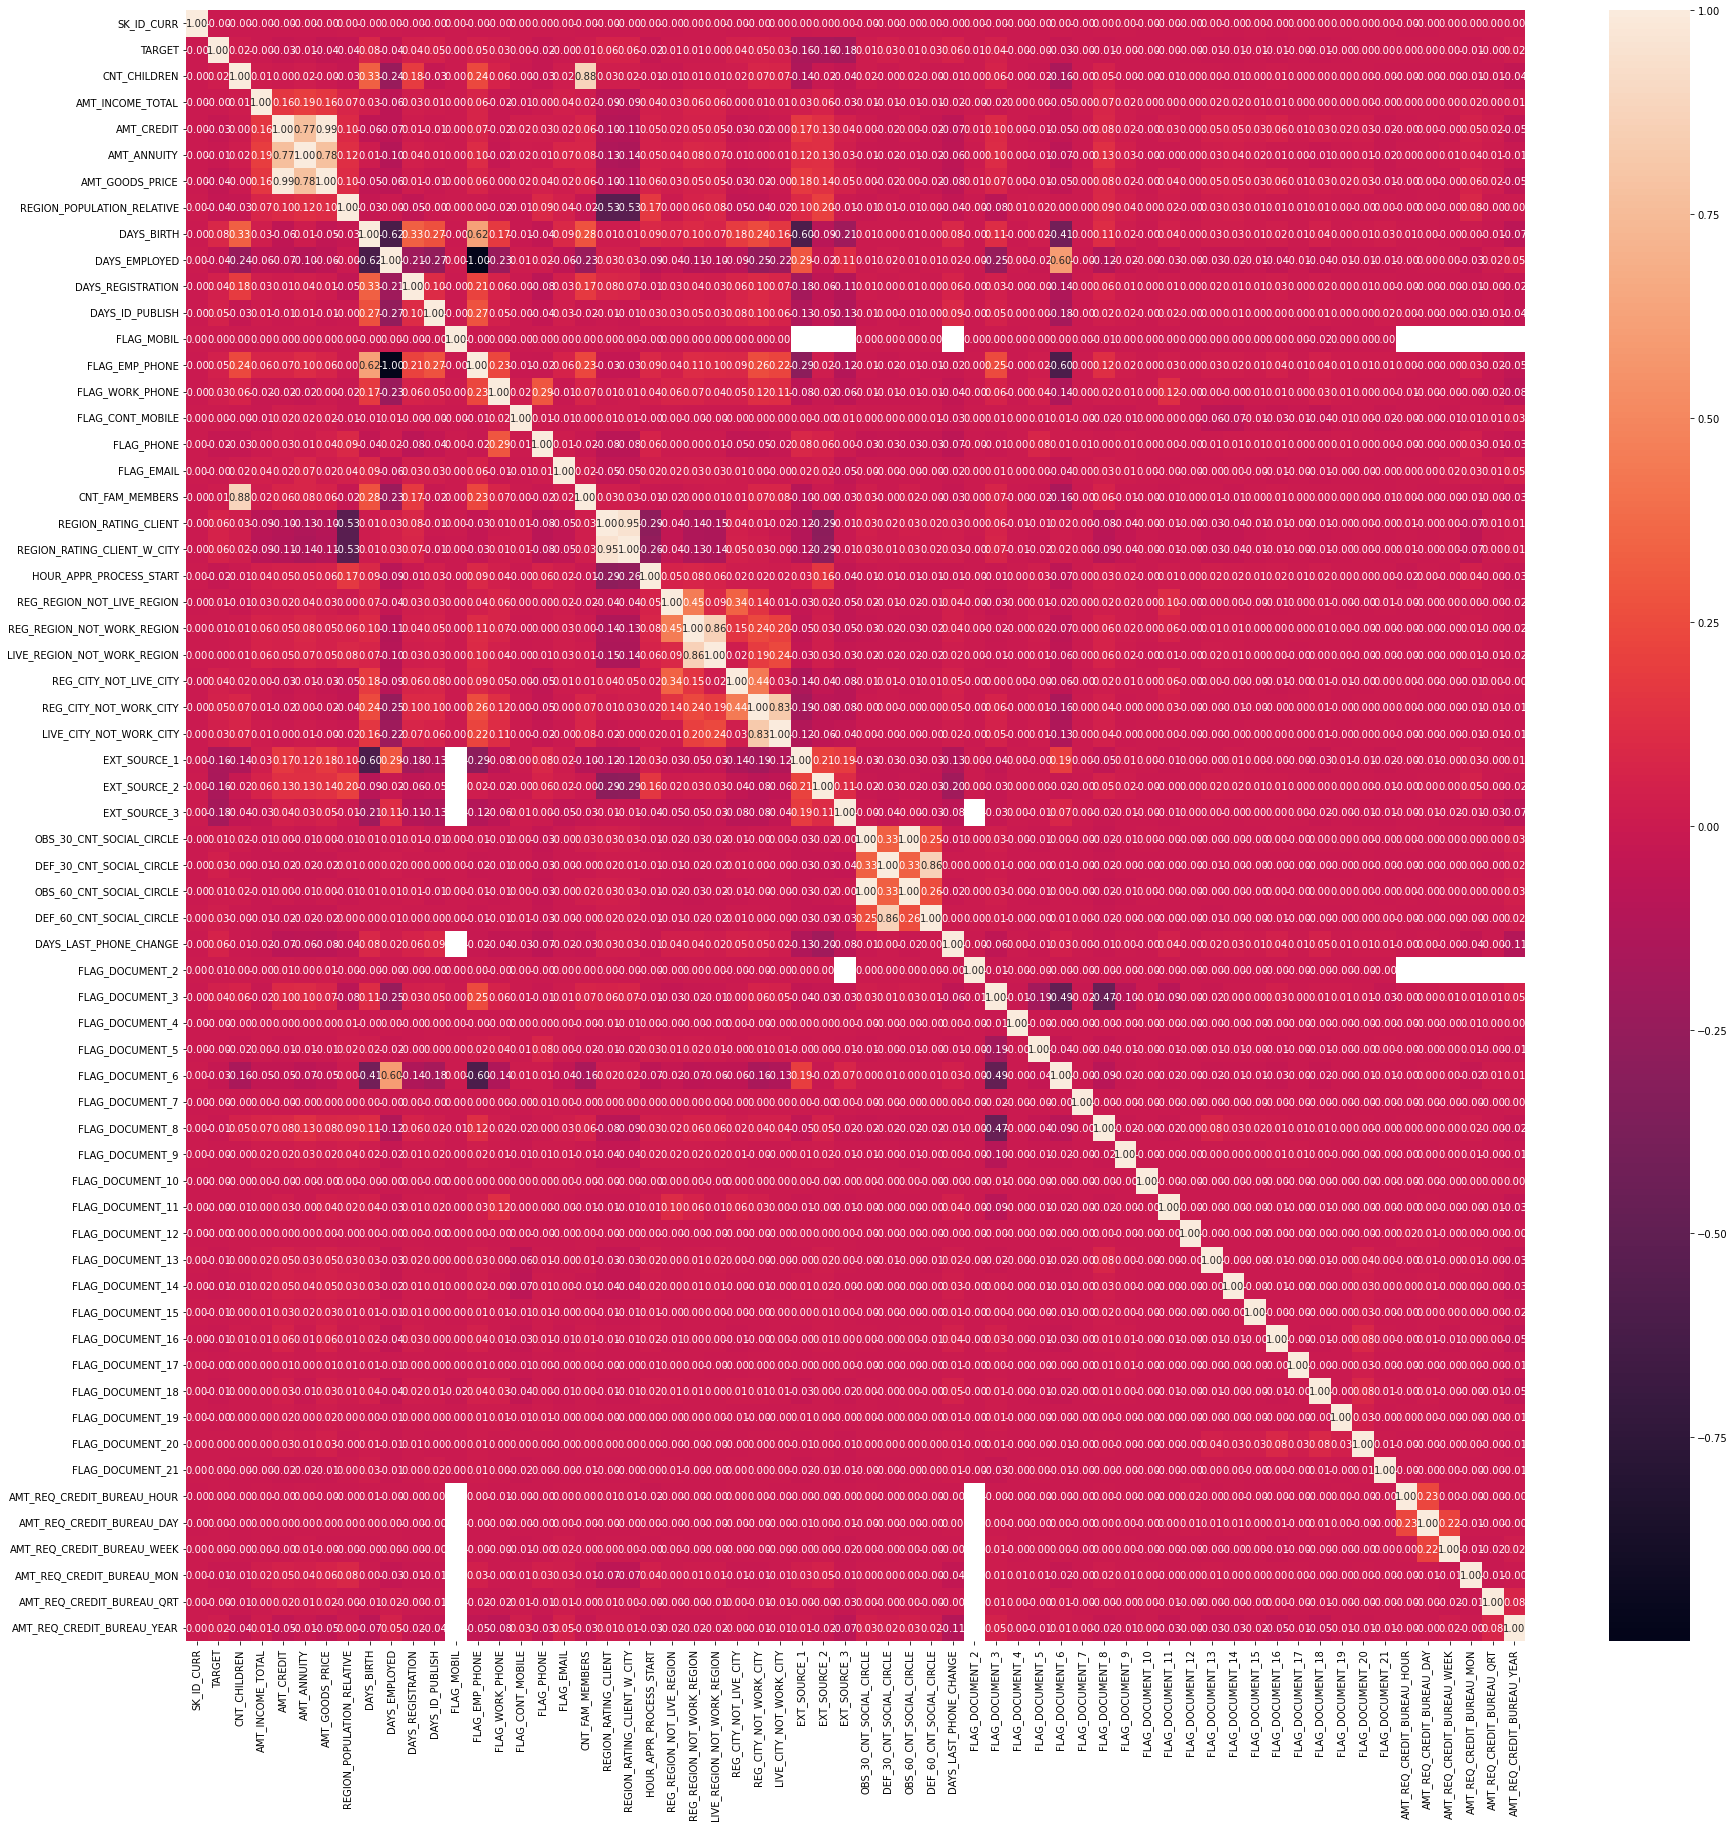

In [15]:
plt.figure(figsize=(30, 30))
sns.heatmap(df_eda.corr(), annot=True, fmt='.2f')
plt.show()

# Preprocessing

In [16]:
df_preprocessing = df_eda.copy()

In [17]:
def preprocessing(df):
    # List drop feature because have high cardinality,high correlation,unnecesarry for credit risk,and majority on 0 value
    list_drop = ['ORGANIZATION_TYPE','FLAG_EMP_PHONE','FLAG_CONT_MOBILE','FLAG_MOBIL','REGION_RATING_CLIENT_W_CITY','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
                 'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON' ,'AMT_REQ_CREDIT_BUREAU_QRT',
                 'WEEKDAY_APPR_PROCESS_START','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
                 'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14',
                 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
                 'DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','LIVE_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION','REG_REGION_NOT_LIVE_REGION']
    df.drop(columns=list_drop, inplace = True)
    
    # Fill Numeric Null Value
    list_num = ['AMT_ANNUITY','DAYS_LAST_PHONE_CHANGE','CNT_FAM_MEMBERS','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_GOODS_PRICE']
    for num in list_num:
        df[num] = df[num].fillna(df[num].median())
        
    # EXT_SORUCE   
    list_ext = ['EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1']
    for ext in list_ext:
        df[ext] = df[ext].fillna(0)
    
    #Fill Category Null Value
    list_cat = ['NAME_TYPE_SUITE']
    for cat in list_cat:
        df[cat] = df[cat].fillna(df[cat].mode()[0])
    df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('Other')
    
    # Create new feature
    df['AGE'] = round((df['DAYS_BIRTH'].abs()/365),0)
    df['EMP_LENGTH'] = round((df['DAYS_EMPLOYED'].abs()/365),0)
    df['REGIST_LENGTH'] = round((df['DAYS_REGISTRATION'].abs()/365),0)
    df['PUBLISH_LENGTH'] = round((df['DAYS_ID_PUBLISH'].abs()/365),0)
    df['PHONE_CHANGE_LENGTH'] = round((df['DAYS_LAST_PHONE_CHANGE'].abs()/365),0)
    list_new_feature = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']
    df.drop(columns= list_new_feature, inplace = True)
    
    # Replace other to non dominant values in categorical
    df['NAME_TYPE_SUITE'].replace(to_replace = ['Other_B','Other_A','Group of people'], value = 'Other', inplace = True)
    df['NAME_INCOME_TYPE'].replace(to_replace = ['Unemployed','Student','Businessman','Maternity leave'], value = 'Other', inplace = True)
    df['NAME_FAMILY_STATUS'].replace(to_replace = ['Civil marriage','Unknown'], value = 'Married', inplace = True)
    df['NAME_HOUSING_TYPE'].replace(to_replace = ['Municipal apartment','Rented apartment','Office apartment','Co-op apartment'], value = 'Other', inplace = True)
    
    # Occupation Type
    office = ['IT staff','HR staff','Secretaries','Accountants','High skill tech staff','Managers','Sales staff','Core staff','Realty agents']
    service = ['Waiters/barmen staff','Private service staff','Cleaning staff','Cooking staff','Security staff','Medicine staff','Drivers']
    labour = ['Low-skill Laborers','Laborers']
    df['OCCUPATION_TYPE'].replace(to_replace = office, value = 'Office Job', inplace = True)
    df['OCCUPATION_TYPE'].replace(to_replace = service, value = 'Service Job', inplace = True)
    df['OCCUPATION_TYPE'].replace(to_replace = labour, value = 'Labour Job', inplace = True)
    
    # Adjuctic value to numeric
    # NAME_CONTRACT_TYPE (1 = Cash loans, 0 = Revolving loans)
    df['NAME_CONTRACT_TYPE'] = np.where(df['NAME_CONTRACT_TYPE']=='Cash loans',1,0)
    # CODE GENDER (1 = M, 0 = F)
    df['CODE_GENDER'] = np.where(df['CODE_GENDER']=='M',1,0)
    # FLAG_OWN_CAR (Y = 1, N = 0)
    df['FLAG_OWN_CAR'] = np.where(df['FLAG_OWN_CAR']=='Y',1,0)
    # FLAG_OWN_REALTY (Y = 1, N = 0)
    df['FLAG_OWN_REALTY'] = np.where(df['FLAG_OWN_REALTY']=='Y',1,0)
    
    # Drop Row that contain XNA in code gender
    df = df.drop(df[df['CODE_GENDER'] == 'XNA'].index,inplace = True)

In [18]:
preprocessing(df_preprocessing)

In [19]:
df_preprocessing.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.00000,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.00000,0.000000,0.000000,0.000000,1.000000e+00
NAME_CONTRACT_TYPE,307511.0,0.904787,0.293509,0.00000,1.000000,1.000000,1.000000,1.000000e+00
CODE_GENDER,307511.0,0.341643,0.474261,0.00000,0.000000,0.000000,1.000000,1.000000e+00
FLAG_OWN_CAR,307511.0,0.340108,0.473746,0.00000,0.000000,0.000000,1.000000,1.000000e+00
FLAG_OWN_REALTY,307511.0,0.693673,0.460968,0.00000,0.000000,1.000000,1.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.00000,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.00000,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.00000,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307511.0,27108.487841,14493.461065,1615.50000,16524.000000,24903.000000,34596.000000,2.580255e+05


In [20]:
# Error value from EMP_LENGTH, we will drop
df_preprocessing = df_preprocessing[df_preprocessing['EMP_LENGTH'] <=100]

## Univariate Analysis After Processing

In [21]:
num = df_preprocessing.select_dtypes(include='number').columns
cat = df_preprocessing.select_dtypes(include='object').columns

In [22]:
print(len(num))
print(len(cat))

30
6


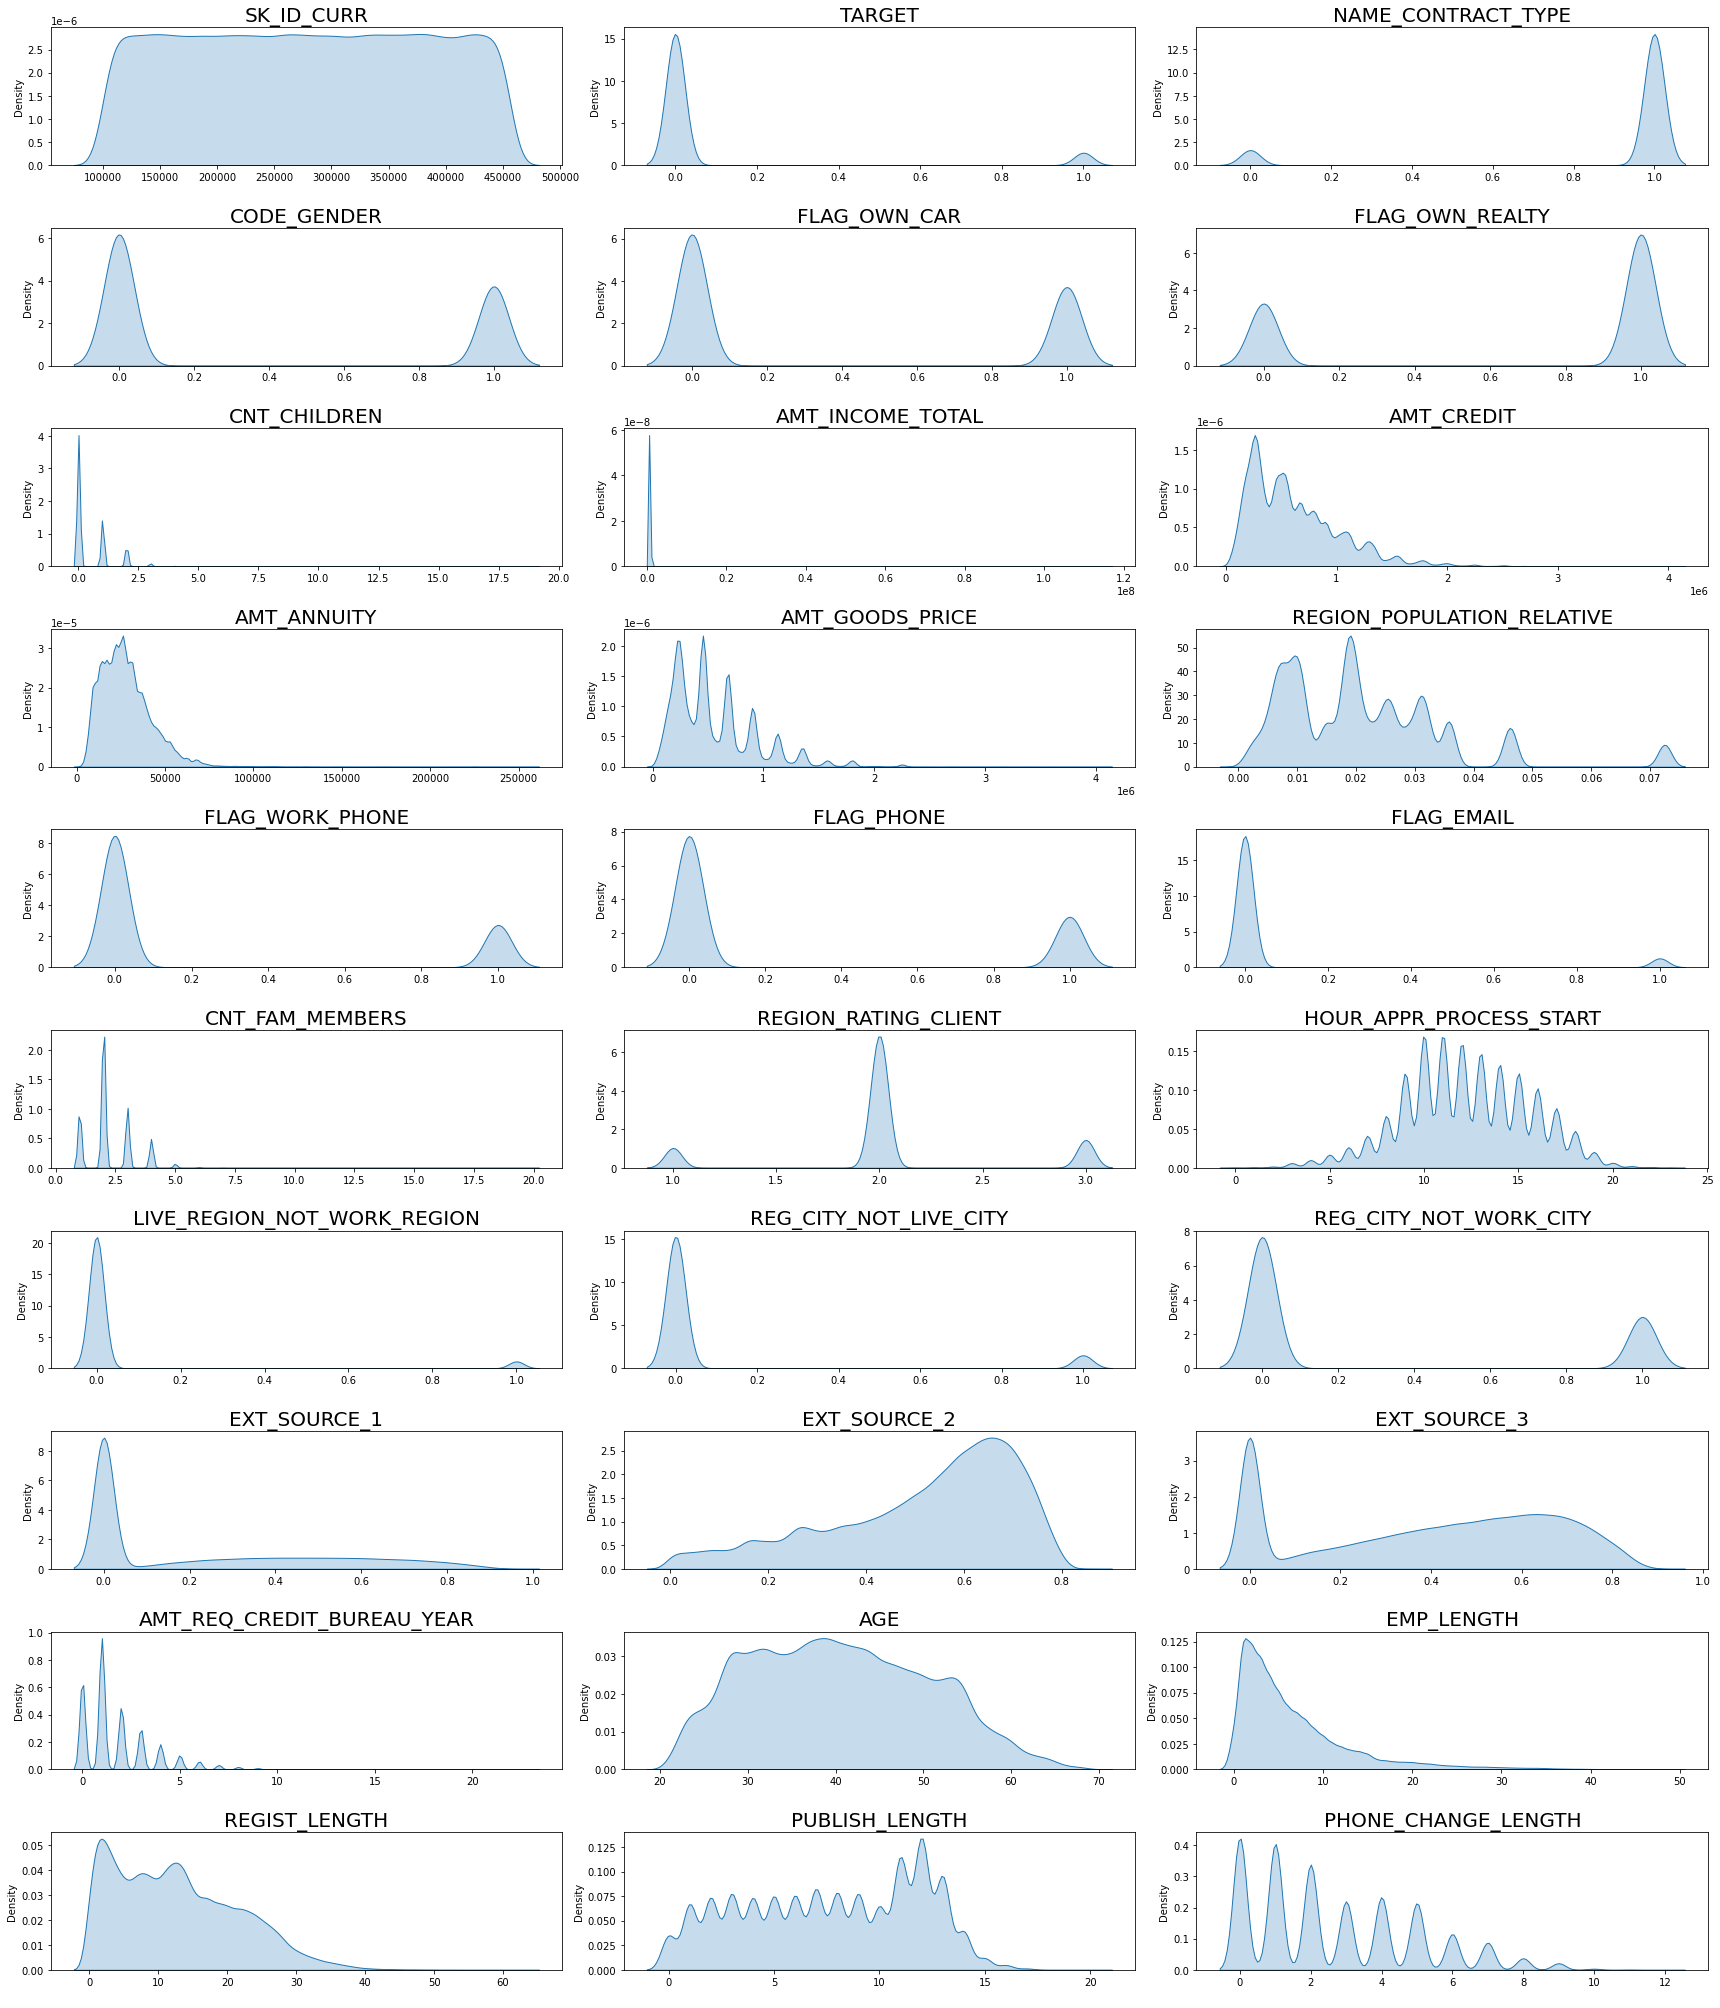

In [23]:
plt.figure(figsize=(24,28))
for i in range(0,len(num)):
    plt.subplot(10,3,i+1)
    sns.kdeplot(x=df_preprocessing[num[i]], palette='viridis', shade=True)
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

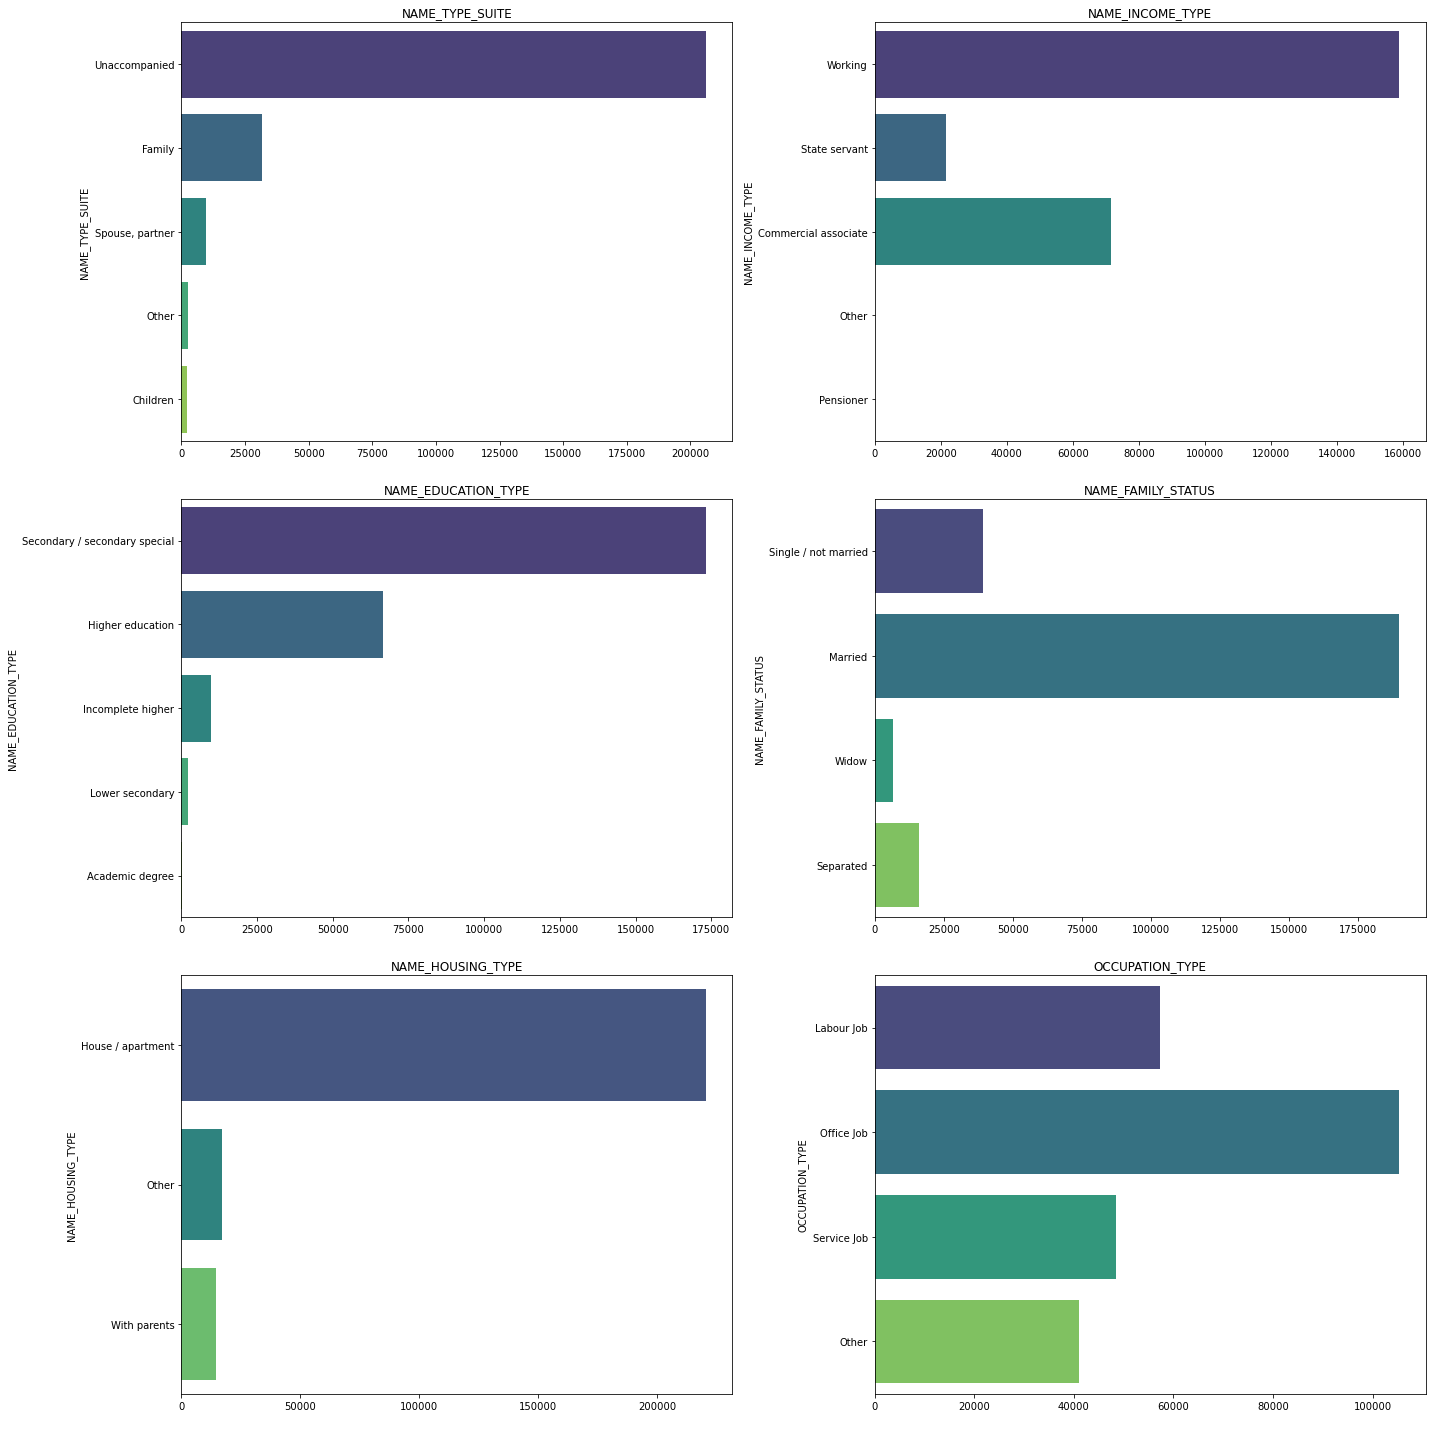

In [24]:
plt.figure(figsize=(20,20))
for i in range(0,len(cat)):
    plt.subplot(3,2,i+1)
    sns.countplot(y=df_preprocessing[cat[i]], orient = 'h',palette='viridis')
    plt.title(cat[i])
    plt.xlabel(' ')
    plt.tight_layout()

### Bivariate Analysis

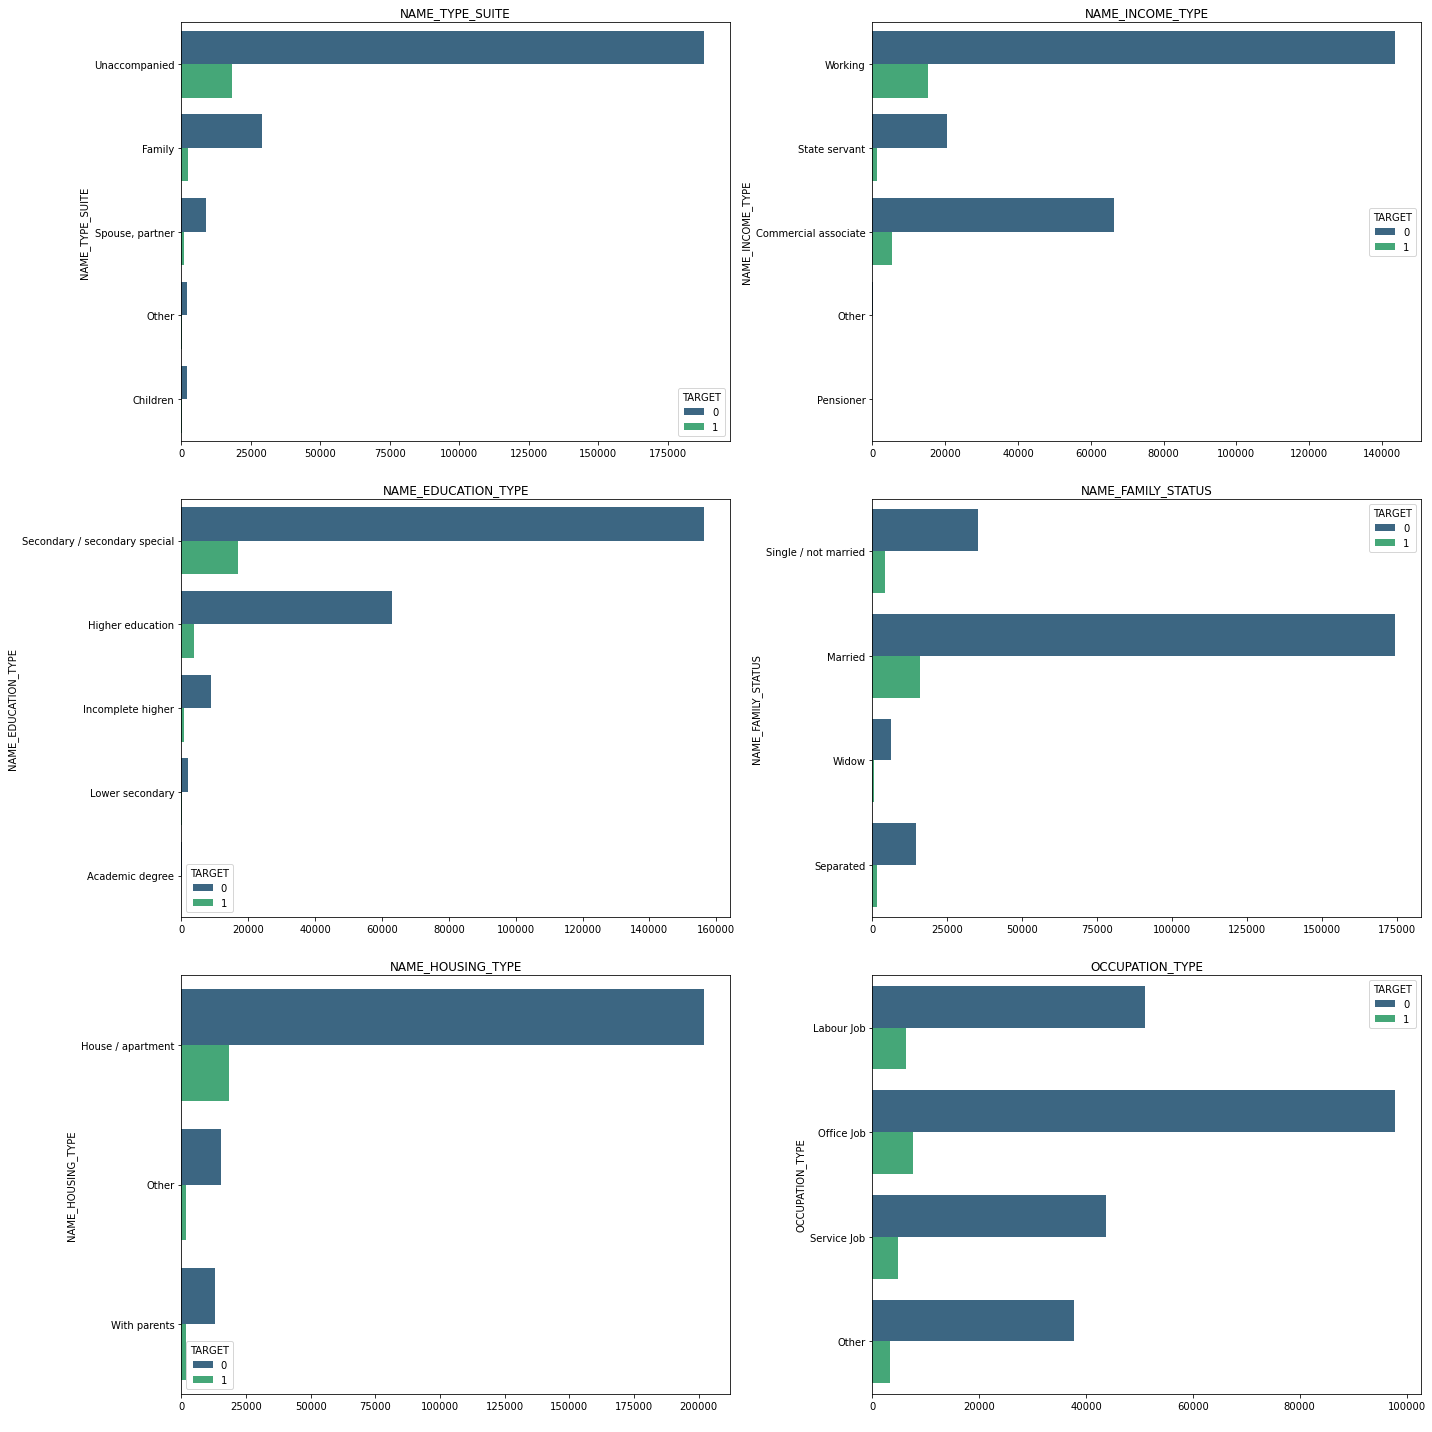

In [25]:
plt.figure(figsize=(20,20))
for i in range(0,len(cat)):
    plt.subplot(3,2,i+1)
    sns.countplot(y=df_preprocessing[cat[i]], palette='viridis', hue=df_eda['TARGET'])
    plt.title(cat[i])
    plt.xlabel(' ')
    plt.tight_layout()

In [26]:
#df_preprocessing.to_csv("df_preprocessing.csv")